In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [4]:
import matplotlib.pyplot as plt

In [5]:
import random

In [6]:
#load training and testing data

In [7]:
mnist = tf.keras.datasets.mnist

In [43]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [44]:
x_train = x_train/255

In [45]:
x_test = x_test/255

In [11]:
#define network architechture using keras

In [47]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to a 1D array
    keras.layers.Dense(128, activation='relu'),   # Hidden layer with 128 neurons and ReLU activation
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons for 10 classes and softmax activation
])

In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
x_train = x_train[0]

In [19]:
#train model using sgd

In [48]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [49]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7291 - loss: 1.0427 - val_accuracy: 0.9031 - val_loss: 0.3594
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9025 - loss: 0.3538 - val_accuracy: 0.9172 - val_loss: 0.2974
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9150 - loss: 0.3007 - val_accuracy: 0.9263 - val_loss: 0.2663
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9242 - loss: 0.2645 - val_accuracy: 0.9305 - val_loss: 0.2460
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9327 - loss: 0.2384 - val_accuracy: 0.9353 - val_loss: 0.2257
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9371 - loss: 0.2226 - val_accuracy: 0.9392 - val_loss: 0.2115
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9408 - loss: 0.2118 - val_accuracy: 0.9424 - val_loss: 0.1991
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9452 - loss: 0.1972 - 

In [46]:
print(x_train.shape)  # Should be (num_samples, 28, 28, 1)
print(x_test.shape)   # Should be (num_samples, 28, 28, 1)
print(y_train.shape)  # Should be (num_samples, 10)
print(y_test.shape)   # Should be (num_samples, 10)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [50]:
#evaluate network

In [51]:
test_loss, test_acc=model.evaluate(x_test, y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9420 - loss: 0.1955
Loss=0.169
Accuracy=0.951


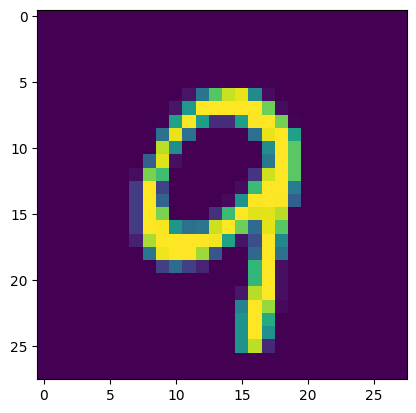

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


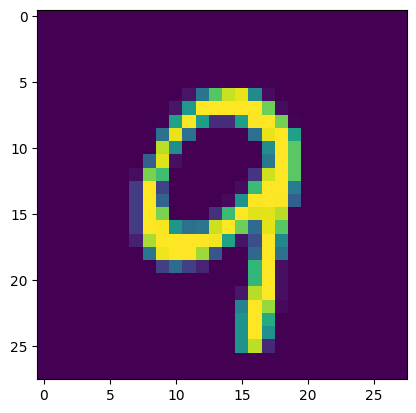

In [54]:
n=random.randint(0, 9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

In [55]:
print('Predicted value: ', predicted_value[n])

Predicted value:  [1.7987347e-04 2.1463600e-06 4.1861655e-03 1.8350531e-04 9.8863412e-03
 4.2037220e-05 6.4067695e-05 7.8930492e-03 3.0375309e-03 9.7452533e-01]


In [56]:
#plot training loss and accuracy

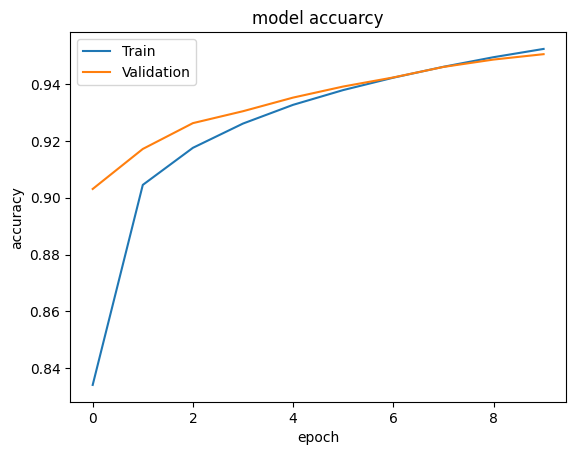

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuarcy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

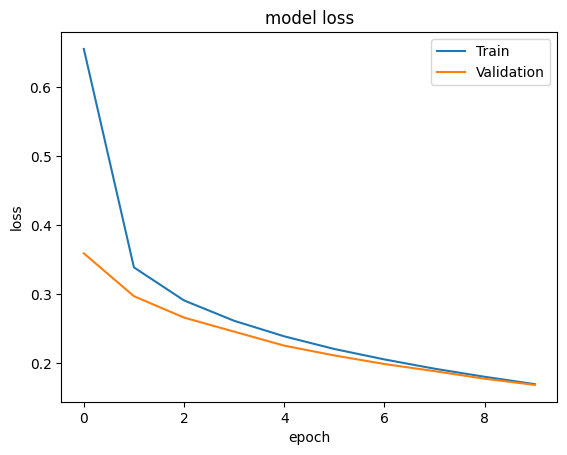

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()